In [229]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

Get Data 

In [230]:
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'
data = pd.read_csv(url, error_bad_lines = False)
data.dtypes

date      object
state     object
fips       int64
cases      int64
deaths     int64
dtype: object

In [231]:
cases = data[['date', 'state', 'cases', 'deaths']]

In [232]:
#For sake of choro map we need to abbreviate choromap.
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [233]:
#Map abbreviation to state.
states = {state: abbrev for abbrev, state in states.items()}
cases['abbrev'] = cases['state'].map(states)
cases

date          state  cases  deaths abbrev
0     2020-01-21     Washington      1       0     WA
1     2020-01-22     Washington      1       0     WA
2     2020-01-23     Washington      1       0     WA
3     2020-01-24       Illinois      1       0     IL
4     2020-01-24     Washington      1       0     WA
...          ...            ...    ...     ...    ...
8424  2020-08-02       Virginia  91782    2218     VA
8425  2020-08-02     Washington  60161    1680     WA
8426  2020-08-02  West Virginia   6854     117     WV
8427  2020-08-02      Wisconsin  58990     956     WI
8428  2020-08-02        Wyoming   2808      26     WY

[8429 rows x 5 columns]

Great, we have added abbreviations to the dataframe. We will keep the state name for ease of use when merging another dataframe. Now we can plot a geographical visual that tells us the prevalence of cases in each state over a certain time period.

In [234]:
import plotly.express as px
fig = px.choropleth(cases,
                   locations='abbrev',
                   color='cases',
                   hover_name = 'abbrev',
                   locationmode = 'USA-states',
                   animation_frame = 'date')

fig.update_layout(
title_text = 'Spread of Covid-19 in the United States',
title_x = 0.5,
geo_scope = 'usa',
geo=dict(
showframe = False,
showcoastlines = False))

fig.show()

We can see the severity of cases as the virus spreads across the United States with the above visual. However, a more helpful statistic will be to measure the virus spread versus the population for each state. Then we can get a more accurate estimate of the significance it holds in each state. 

In [235]:
#Importing population data.
pop_data = pd.read_csv(r"C:\Users\19712\Documents\Python Scripts\population estimates.txt", sep = '\t', thousands = ',', header = int())
pop_data.columns = ['rank', 'state', 'population', 'percent of Tot']
pop_data.drop(['percent of Tot', 'rank'] , axis=1, inplace=True)

In [236]:
#Merge population to dataframe.
cases = data.merge(pop_data,
          how = 'left',
          left_on = 'state',
          right_on = 'state')

Now that we have a more complete dataframe we will create another visual to account for the severity of cases in each state. To do this we will use the same as above for simplicity. First, we must determine a rolling percentage of cases in each state so that we can determine the severity of the virus. 

In [237]:
#Creating percentage column in dataframe.
cases['percent'] = cases['cases'] / cases['population'] * 100

In [238]:
#Add abbreviation again.
states = {state: abbrev for abbrev, state in states.items()}
cases['abbrev'] = cases['state'].map(states)
cases

date          state  fips  cases  deaths  population   percent  \
0     2020-01-21     Washington    53      1       0   7614893.0  0.000013   
1     2020-01-22     Washington    53      1       0   7614893.0  0.000013   
2     2020-01-23     Washington    53      1       0   7614893.0  0.000013   
3     2020-01-24       Illinois    17      1       0  12671821.0  0.000008   
4     2020-01-24     Washington    53      1       0   7614893.0  0.000013   
...          ...            ...   ...    ...     ...         ...       ...   
8424  2020-08-02       Virginia    51  91782    2218   8535519.0  1.075295   
8425  2020-08-02     Washington    53  60161    1680   7614893.0  0.790044   
8426  2020-08-02  West Virginia    54   6854     117   1792147.0  0.382446   
8427  2020-08-02      Wisconsin    55  58990     956   5822434.0  1.013150   
8428  2020-08-02        Wyoming    56   2808      26    578759.0  0.485176   

     abbrev  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
...     ...  
8424    NaN  
8425    NaN  
8426    NaN  
8427    NaN  
8428    NaN  

[8429 rows x 8 columns]

In [239]:
import plotly.express as px
fig = px.choropleth(cases,
                   locations='abbrev',
                   color='percent',
                   hover_name = 'abbrev',
                   locationmode = 'USA-states',
                   animation_frame = 'date')

fig.update_layout(
title_text = 'Spread of Covid-19 in the United States (%)',
title_x = 0.5,
geo_scope = 'usa',
geo=dict(
showframe = False,
showcoastlines = False))

fig.show()

Analysis here

In [240]:
sorted_cases = cases.sort_values('cases', ascending=False)
state_max_cases = sorted_cases.drop_duplicates('state')
state_max_cases.drop('abbrev', axis=1, inplace=True)

In [241]:
#Top 10 states with most cases.
cases_top10 = state_max_cases.nlargest(10, 'cases')

#Top 10 states with highest severity of cases.
percent_top10 = state_max_cases.nlargest(10, 'percent')

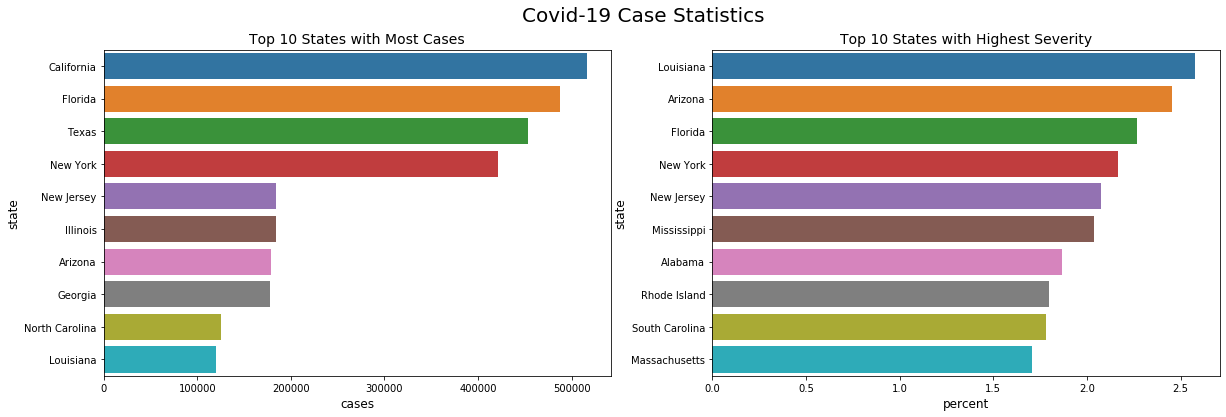

In [242]:
fig, axes = plt.subplots(1, 2, sharex = False, sharey = False, figsize = (20,6))
fig.suptitle("Covid-19 Case Statistics", fontsize = 20)
axes[0].set_title('Top 10 States with Most Cases', fontsize = 14)
axes[0].set_xlabel('cases', fontsize = 12)
axes[0].set_ylabel('state', fontsize = 12)
axes[1].set_title('Top 10 States with Highest Severity', fontsize = 14)
axes[1].set_xlabel('percent', fontsize = 12)
axes[1].set_ylabel('state', fontsize = 12)

sns.barplot(ax = axes[0], data = cases_top10, 
            y = 'state', 
            x = 'cases')

sns.barplot(ax = axes[1], data = percent_top10, 
            y = 'state', 
            x = 'percent')




In [243]:
#Death rate.
percent_deaths = cases['deaths'] / cases['population'] * 100
cases['death rate'] = percent_deaths

In [244]:
#Choro map
import plotly.express as px
fig = px.choropleth(cases,
                   locations='abbrev',
                   color='deaths',
                   hover_name = 'abbrev',
                   locationmode = 'USA-states',
                   animation_frame = 'date')

fig.update_layout(
title_text = 'Covid-19 Deaths in the United States',
title_x = 0.5,
geo_scope = 'usa',
geo=dict(
showframe = False,
showcoastlines = False))

fig.show()

In [245]:
import plotly.express as px
fig = px.choropleth(cases,
                   locations='abbrev',
                   color='death rate',
                   hover_name = 'abbrev',
                   locationmode = 'USA-states',
                   animation_frame = 'date')

fig.update_layout(
title_text = 'Covid-19 Death Rate in the United States',
title_x = 0.5,
geo_scope = 'usa',
geo=dict(
showframe = False,
showcoastlines = False))

fig.show()

In [246]:
sorted_deaths = cases.sort_values('deaths', ascending = False)
state_max_deaths = sorted_deaths.drop_duplicates('state')
state_max_deaths.drop('abbrev', axis=1, inplace=True)

In [247]:
#Top 10 states with most deaths.
deaths_top10 = state_max_deaths.nlargest(10, 'deaths')

#Top 10 states with highest death rate.
death_ratetop10 = state_max_deaths.nlargest(10, 'death rate')


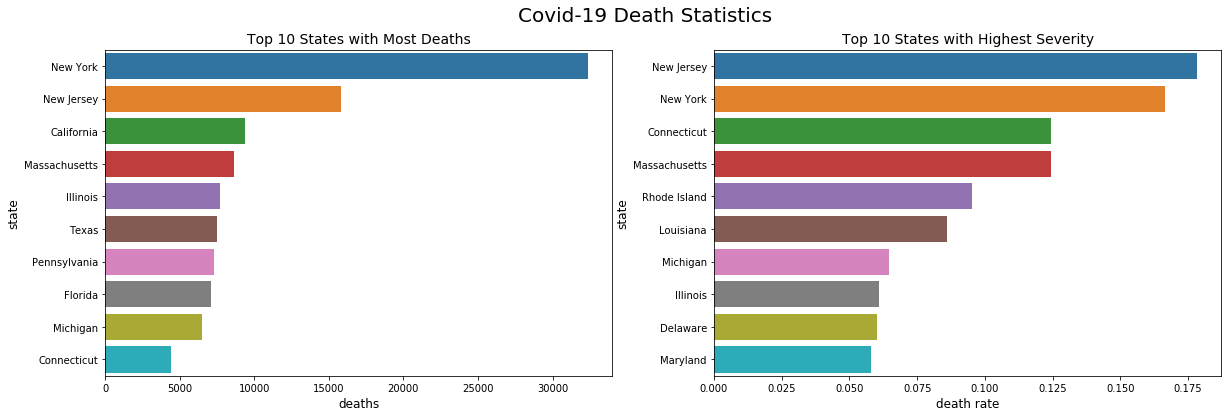

In [248]:
fig, axes = plt.subplots(1, 2, sharex = False, sharey = False, figsize = (20,6))
fig.suptitle("Covid-19 Death Statistics", fontsize = 20)
axes[0].set_title('Top 10 States with Most Deaths', fontsize = 14)
axes[0].set_xlabel('cases', fontsize = 12)
axes[0].set_ylabel('state', fontsize = 12)
axes[1].set_title('Top 10 States with Highest Severity', fontsize = 14)
axes[1].set_xlabel('percent', fontsize = 12)
axes[1].set_ylabel('state', fontsize = 12)

sns.barplot(ax = axes[0], data = deaths_top10, 
            y = 'state', 
            x = 'deaths')

sns.barplot(ax = axes[1], data = death_ratetop10, 
            y = 'state', 
            x = 'death rate')


# LOOK AT PLOTS BELOW. SHOULD BE EXPONENTIAL. 
Add labels with events to the graphs to indicate shutdown, masks required, etc.

In [362]:
cum_deaths = 0
cum_cases = 0
lst_cases = []
lst_deaths = []

for case in state_max_cases['cases']:
    cum_cases+=case
    lst_cases.append(case)

for deaths in state_max_deaths['deaths']:
    cum_deaths+=deaths
    lst_deaths.append(cum_deaths)


Text(0.5, 1.0, 'Covid-19 Deaths in the United States')

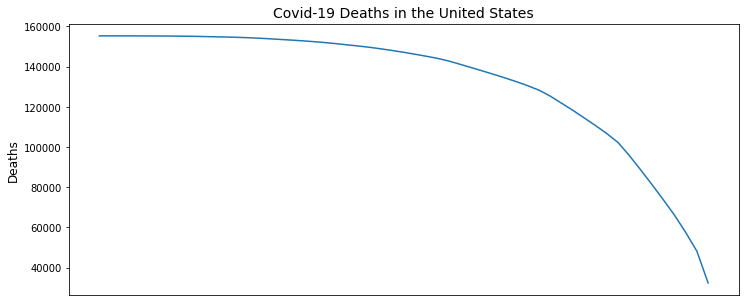

In [357]:
#Plot deaths over time.
plt.figure(figsize = (12,5))
plt.plot(lst_deaths[::-1])
plt.xticks([])
plt.ylabel("Deaths", fontsize = 12)
plt.title('Covid-19 Deaths in the United States', fontsize = 14)

#TO DO:
#Add in Months by batching to cumulative plots. 

Text(0.5, 1.0, 'Covid-19 Cases in the United States')

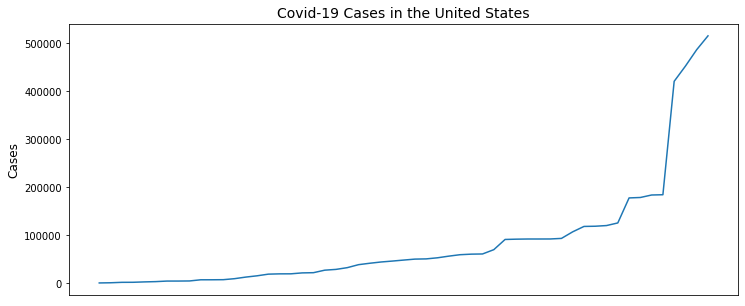

In [359]:
plt.figure(figsize = (12,5))
plt.plot(lst_cases[::-1])
plt.xticks([])
plt.ylabel('Cases', fontsize = 12)
plt.title('Covid-19 Cases in the United States', fontsize = 14)

#Plots should be logarithmic not exponential. 

In [290]:
#States affected over time. 
states_affected = []
cases_date = cases[['cases', 'date','state']]
for i, row in cases_date.iterrows():
    if row['cases'] != 0:
        states_affected.append(row)
states_affected = pd.DataFrame(states_affected)

In [295]:
#First 10 States to Contract Covid-19. 
sorted_dates = states_affected.sort_values('date', ascending = True)
sorted_uniq_dates = sorted_dates.drop_duplicates('state')
sorted_uniq_dates.head(10)

cases        date          state
0        1  2020-01-21     Washington
3        1  2020-01-24       Illinois
5        1  2020-01-25     California
8        1  2020-01-26        Arizona
35       1  2020-02-01  Massachusetts
57       1  2020-02-05      Wisconsin
98       1  2020-02-12          Texas
133     10  2020-02-17       Nebraska
199      1  2020-02-25           Utah
225      1  2020-02-28         Oregon

Text(0, 0.5, 'States Afflicted')

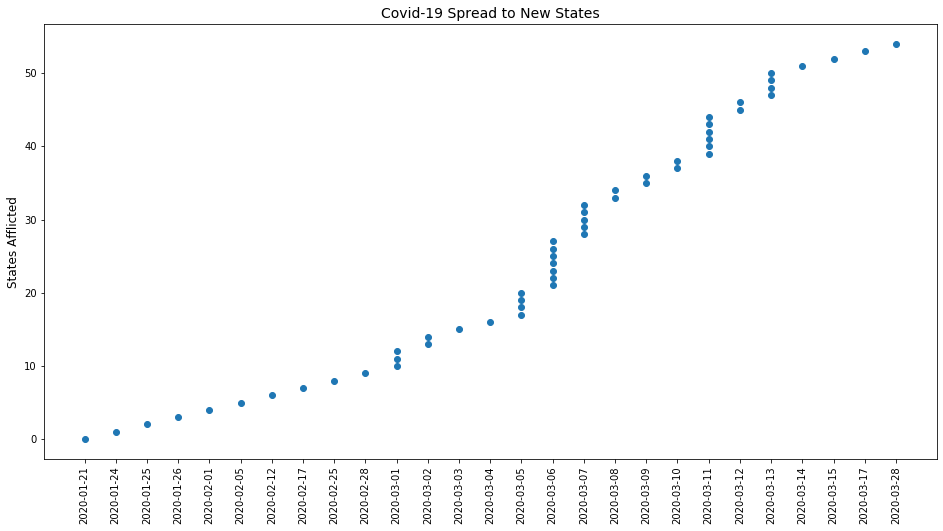

In [316]:
#Spread of Covid-19 to New States.
state_counts = []
for i in range(0, len(sorted_uniq_dates)):
    state_counts.append(i)

sorted_uniq_dates['count'] = state_counts

plt.figure(figsize = (16,8))
plt.scatter(x = sorted_uniq_dates['date'], y = sorted_uniq_dates['count'])
plt.xticks(rotation=90)
plt.title('Covid-19 Spread to New States', fontsize = 14)
plt.ylabel('States Afflicted', fontsize = 12)

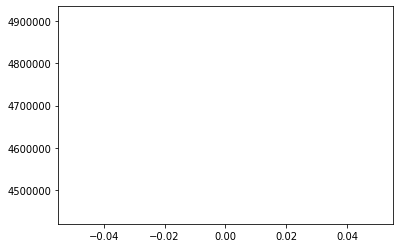

In [352]:
#Covid-19 Daily New Confirmed Cases.


In [363]:
#Covid-19 Daily New Deaths Reported.

In [364]:
#Claim: Covid-19 hitting Democratic States harder than Republican??
#Provide evidence based on data,  using cumulalative and creating to different lists of status. 

In [ ]:
#Coronavirus search trends??